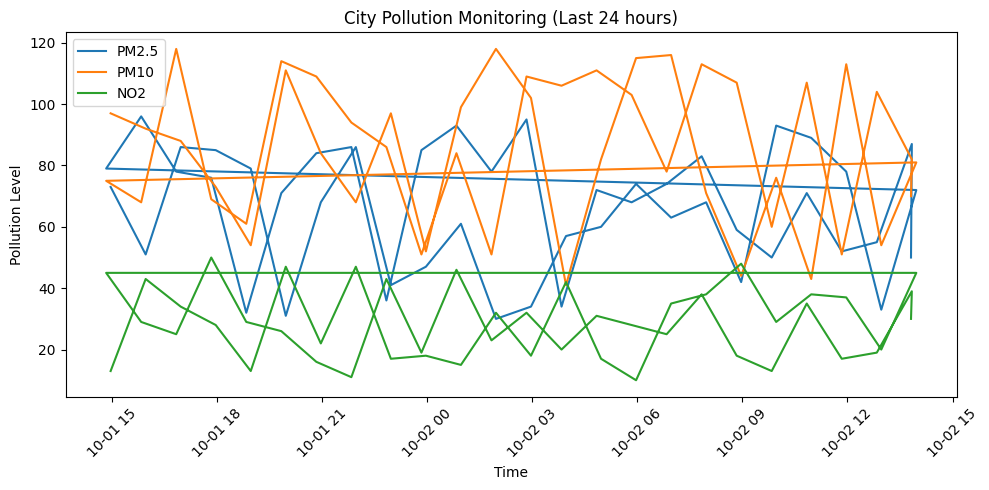

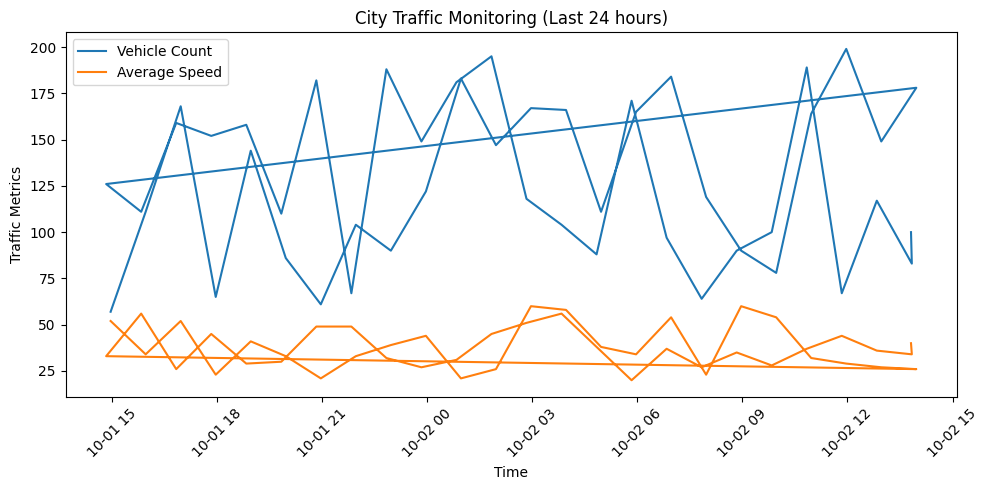

In [1]:

from pymongo import MongoClient
import pandas as pd
import matplotlib.pyplot as plt
import random
from datetime import datetime, timedelta
client = MongoClient("mongodb://localhost:27017/")
db = client["smart_city"]
collection = db["traffic_pollution"]

for i in range(24):
    record = {
        "timestamp": (datetime.now() - timedelta(hours=i)).strftime("%Y-%m-%d %H:%M:%S"),
        "location": {"lat": 12.9716, "long": 77.5946},
        "traffic": {"vehicle_count": random.randint(50, 200), "average_speed": random.randint(20, 60)},
        "pollution": {"PM2_5": random.randint(30, 100), "PM10": random.randint(40, 120), "NO2": random.randint(10, 50)}
    }
    collection.insert_one(record)
records = list(collection.find())
df = pd.DataFrame(records)
df['timestamp'] = pd.to_datetime(df['timestamp'])

plt.figure(figsize=(10,5))
plt.plot(df['timestamp'], df['pollution'].apply(lambda x: x['PM2_5']), label="PM2.5")
plt.plot(df['timestamp'], df['pollution'].apply(lambda x: x['PM10']), label="PM10")
plt.plot(df['timestamp'], df['pollution'].apply(lambda x: x['NO2']), label="NO2")
plt.xlabel("Time")
plt.ylabel("Pollution Level")
plt.title("City Pollution Monitoring (Last 24 hours)")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.figure(figsize=(10,5))
plt.plot(df['timestamp'], df['traffic'].apply(lambda x: x['vehicle_count']), label="Vehicle Count")
plt.plot(df['timestamp'], df['traffic'].apply(lambda x: x['average_speed']), label="Average Speed")
plt.xlabel("Time")
plt.ylabel("Traffic Metrics")
plt.title("City Traffic Monitoring (Last 24 hours)")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
